In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
sns.set(style="whitegrid")

In [3]:
from sklearn.datasets import load_iris 
iris_data = load_iris() 
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target 

In [14]:
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) 
print(iris_df.head()) 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [15]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


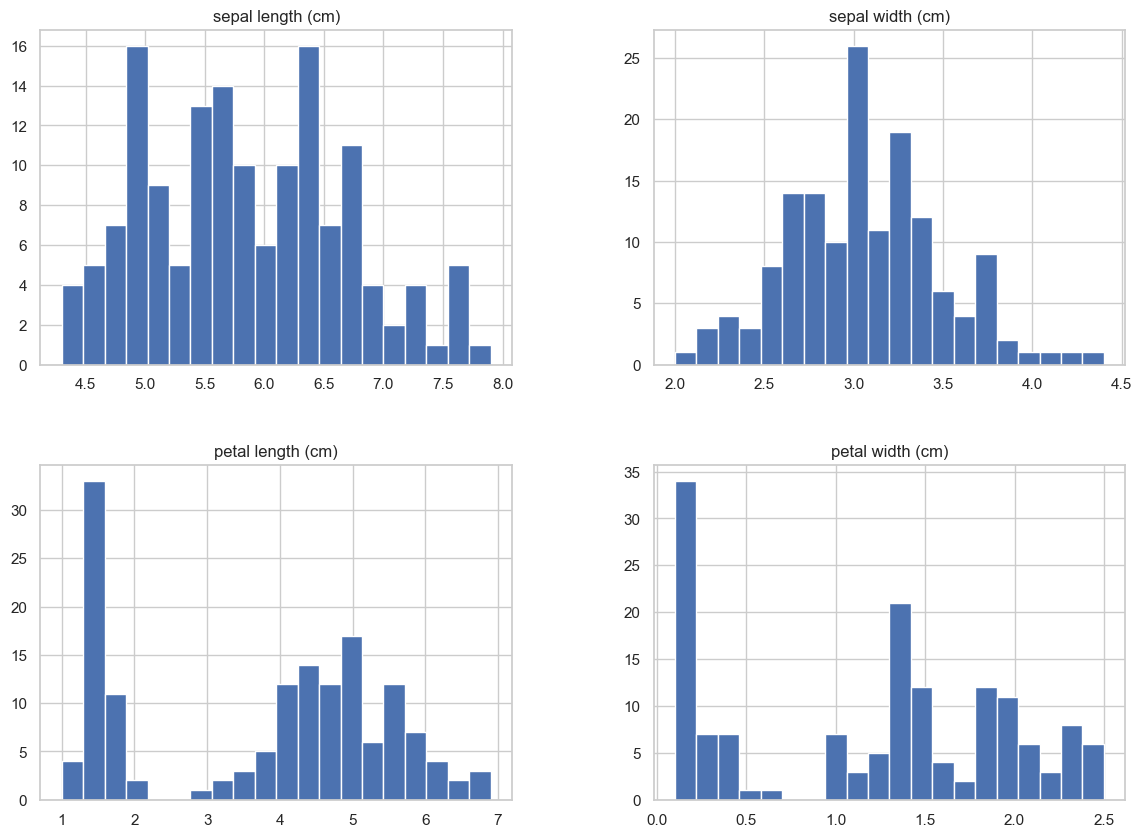

In [16]:
iris_df.hist(bins=20, figsize=(14, 10)) 
plt.show() 

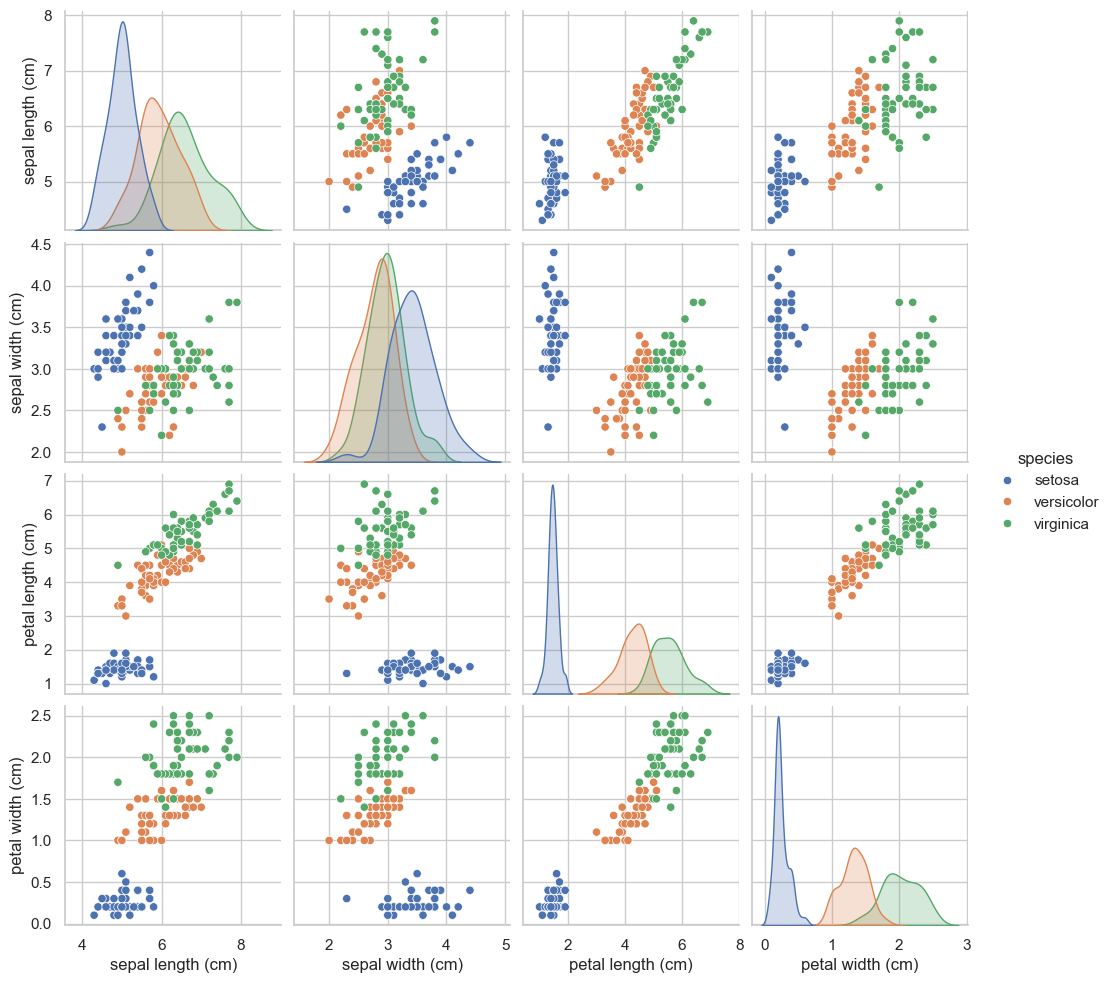

In [17]:
sns.pairplot(iris_df, hue='species') 
plt.show()

In [18]:
setosa = iris_df[iris_df['species'] == 'setosa'] 
versicolor = iris_df[iris_df['species'] == 'versicolor'] 

In [19]:
t_stat, p_val = stats.ttest_ind(setosa['sepal length (cm)'], versicolor['sepal length (cm)'])
print(f"T-statistic: {t_stat}, P-value: {p_val}") 

T-statistic: -10.52098626754911, P-value: 8.985235037487079e-18


In [20]:
f_stat, p_val = stats.f_oneway( 
 iris_df[iris_df['species'] == 'setosa']['sepal length (cm)'], 
 iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)'], 
 iris_df[iris_df['species'] == 'virginica']['sepal length (cm)'] 
) 
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: 119.26450218450468, P-value: 1.669669190769383e-31


In [12]:
correlation_matrix = iris_df.corr() 

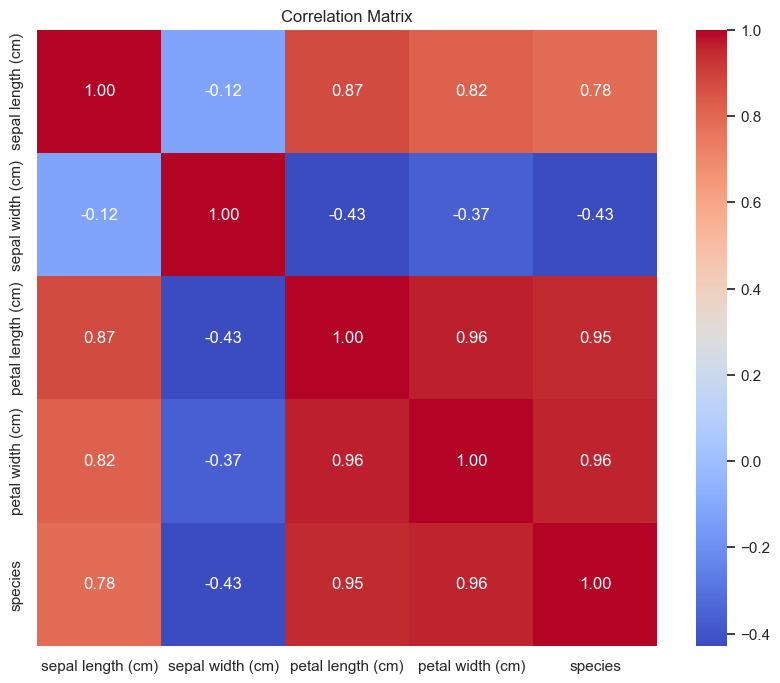

In [13]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix') 
plt.show()